In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !git clone https://github.com/ultralytics/yolov5  # clone repo
%cd /content/drive/MyDrive/social_distancing_detector/yolov5/
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.0+cu101 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', major=7, minor=0, total_memory=16130MB, multi_processor_count=80)


In [ ]:
# !fusermount -u drive
# !google-drive-ocamlfuse drive

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
fusermount: bad mount point drive: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
/bin/bash: google-drive-ocamlfuse: command not found


In [ ]:
import tensorflow
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir logs runs/train

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2020-12-04 16:27:55.983809: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--purge_orphaned_data BOOL] [--db URI] [--db_import]
                   [--inspect] [--version_tb] [--tag TAG] [--event_file PATH]
                   [--path_prefix PATH] [--window_title TEXT]
                   [--max_reload_threads COUNT] [--reload_interval SECONDS]
                   [--reload_task TYPE] [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [--debugger_data_server_grpc_port PORT]
                   [--debugger_port PORT]
                   [--

In [ ]:
# Weights & Biases (optional)
%pip install -q wandb  
!wandb login  # use 'wandb disabled' or 'wandb enabled' to disable or enable

wandb: Currently logged in as: tomjjoy (use `wandb login --relogin` to force relogin)


In [ ]:
%cd drive/MyDrive/social_distancing_detector/yolov5/

/content/drive/MyDrive/social_distancing_detector/yolov5


In [ ]:
%pwd

'/content/drive/My Drive/social_distancing_detector/yolov5'

In [ ]:
# Train YOLOv5x on updates dataset 3000 epochs
!python train.py --img 416 --batch 16 --epochs 3000 --data dataset.yaml --weights yolov5x.pt --cache --name final_model

Streaming output truncated to the last 5000 lines.
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 4/4 [00:00<00:00,  7.44it/s]
                 all          51         323       0.512       0.589       0.627       0.464

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
 2010/2999      7.2G   0.01261   0.02782  0.001636   0.04206       126       416: 100%|██████████| 19/19 [00:05<00:00,  3.78it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 4/4 [00:00<00:00,  7.85it/s]
                 all          51         323       0.521       0.588       0.626       0.465

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
 2011/2999      7.2G   0.01315    0.0293  0.001309   0.04376       111       416: 100%|██████████| 19/19 [00:05<00:00,  3.76it/s]
               Class      Images     Targets           P   

In [ ]:
%pwd

'/content/drive/My Drive/social_distancing_detector/yolov5'

7: 39.09: [[38.56, 38.56, 39.62, 39.62]]

5:

In [ ]:
!python mydetect.py --source ../data/images/screenshot2.png --weights runs/train/final_model/weights/best.pt --conf 0.25

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../data/images/screenshot2.png', update=False, view_img=False, weights=['runs/train/final_model/weights/best.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16130MB)

Fusing layers... 
Model Summary: 484 layers, 88404072 parameters, 0 gradients
image 1/1 /content/drive/My Drive/social_distancing_detector/data/images/screenshot2.png: 0 pixels per metric(inches): 0.3016759776536313
1 pixels per metric(inches): 0.6067415730337079
2 pixels per metric(inches): 0.23478260869565218
3 pixels per metric(inches): 0.3103448275862069
4 pixels per metric(inches): 0.31213872832369943
5 pixels per metric(inches): 0.22784810126582278
6 pixels per metric(inches): 0.225
7 pixels per metric(inches): 0.20532319391634982
1 - {113.17: [[112.9, 109.77, 116.52, 113.5]], 206.98: [[205.73, 204.

In [ ]:
Image(filename='runs/detect/exp116/screenshot2.png', width=1100)

Output hidden; open in https://colab.research.google.com to view.

In [40]:
!python mydetect.py --source ../data/videos/trial3.mp4 --weights runs/train/final_model/weights/best.pt --conf 0.25

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../data/videos/trial3.mp4', update=False, view_img=False, weights=['runs/train/final_model/weights/best.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16130MB)

Fusing layers... 
Model Summary: 484 layers, 88404072 parameters, 0 gradients
video 1/1 (1/1592) /content/drive/My Drive/social_distancing_detector/data/videos/trial3.mp4: 384x640 8 mans, 1 womans, Done. (0.020s)
video 1/1 (2/1592) /content/drive/My Drive/social_distancing_detector/data/videos/trial3.mp4: 384x640 8 mans, 1 womans, Done. (0.036s)
video 1/1 (3/1592) /content/drive/My Drive/social_distancing_detector/data/videos/trial3.mp4: 384x640 8 mans, Done. (0.020s)
video 1/1 (4/1592) /content/drive/My Drive/social_distancing_detector/data/videos/trial3.mp4: 384x640 6 mans, Done. (0.020s)
video 1/1 (5/1592) 

In [ ]:
!python detect.py --source ../data/images/test --weights runs/train/exp5/weights/best.pt --conf 0.25

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../data/images/test', update=False, view_img=False, weights=['runs/train/exp5/weights/best.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16130MB)

Fusing layers... 
Model Summary: 232 layers, 7251912 parameters, 0 gradients
image 1/20 /content/drive/My Drive/social_distancing_detector/data/images/test/images (1).jpeg: 448x640 1 mans, 3 womans, Done. (0.014s)
image 2/20 /content/drive/My Drive/social_distancing_detector/data/images/test/images (10).jpeg: 448x640 3 mans, 3 womans, Done. (0.012s)
image 3/20 /content/drive/My Drive/social_distancing_detector/data/images/test/images (11).jpeg: 416x640 2 mans, Done. (0.013s)
image 4/20 /content/drive/My Drive/social_distancing_detector/data/images/test/images (12).jpeg: 640x416 1 mans, Done. (0.012s)
image 5/20 /content/dr

In [ ]:
!python mydetect.py --source ../data/videos/trial1.mp4 --weights runs/train/model/weights/best.pt --conf 0.25

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../data/videos/trial1.mp4', update=False, view_img=False, weights=['runs/train/model/weights/best.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16130MB)

Fusing layers... 
Model Summary: 484 layers, 88404072 parameters, 0 gradients
video 1/1 (1/1694) /content/drive/My Drive/social_distancing_detector/data/videos/trial1.mp4: 384x640 2 mans, 2 childs, Done. (0.022s)
video 1/1 (2/1694) /content/drive/My Drive/social_distancing_detector/data/videos/trial1.mp4: 384x640 3 mans, 2 childs, Done. (0.022s)
video 1/1 (3/1694) /content/drive/My Drive/social_distancing_detector/data/videos/trial1.mp4: 384x640 3 mans, 1 womans, 2 childs, Done. (0.031s)
video 1/1 (4/1694) /content/drive/My Drive/social_distancing_detector/data/videos/trial1.mp4: 384x640 3 mans, 1 womans, 2 childs, 

In [ ]:
!python detect.py --source ../data/images/dist.jpg --weights runs/train/model/weights/best.pt --conf 0.25
#Image(filename='runs/detect/exp10/dist.jpg', width=600)

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../data/images/dist.jpg', update=False, view_img=False, weights=['runs/train/model/weights/best.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16130MB)

Fusing layers... 
Model Summary: 484 layers, 88404072 parameters, 0 gradients
image 1/1 /content/drive/My Drive/social_distancing_detector/data/images/dist.jpg: 448x640 5 mans, 3 womans, Done. (0.021s)
Results saved to runs/detect/exp10
Done. (1.145s)


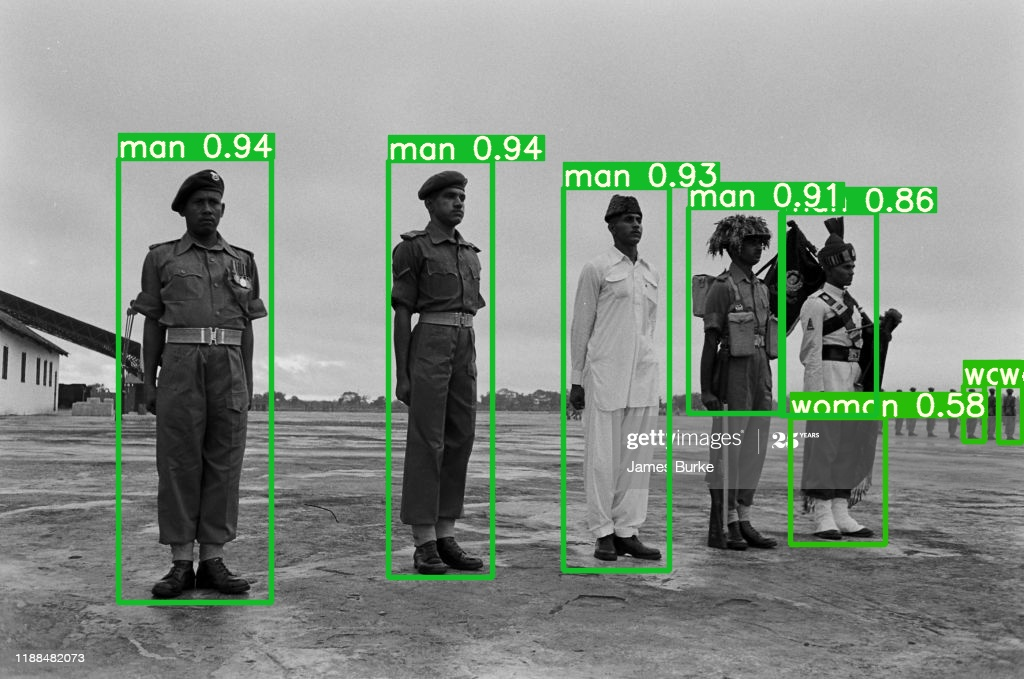

In [ ]:
Image(filename='runs/detect/exp10/dist.jpg', width=600)

In [ ]:
!python mydetect.py --source ../data/images/screenshot2.png --weights runs/train/model/weights/best.pt --conf 0.25

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../data/images/screenshot2.png', update=False, view_img=False, weights=['runs/train/model/weights/best.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16130MB)

Fusing layers... 
Model Summary: 484 layers, 88404072 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/social_distancing_detector/data/images/screenshot2.png: 384x640 6 mans, 3 womans, Done. (0.020s)
Results saved to runs/detect/exp97
Done. (2.841s)


In [ ]:
%pwd

'/content/drive/My Drive/social_distancing_detector/yolov5'

In [ ]:
Image(filename='runs/detect/exp97/screenshot2.png', width=1100)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
###     a #!python mydetect.py --source ../data/videos/trial1.mp4 --weights runs/train/model/weights/best.pt --conf 0.25

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../data/videos/trial1.mp4', update=False, view_img=False, weights=['runs/train/model/weights/best.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16130MB)

Fusing layers... 
Model Summary: 484 layers, 88404072 parameters, 0 gradients
video 1/1 (1/1694) /content/drive/MyDrive/social_distancing_detector/data/videos/trial1.mp4: 384x640 2 mans, 2 childs, Done. (0.020s)
video 1/1 (2/1694) /content/drive/MyDrive/social_distancing_detector/data/videos/trial1.mp4: 384x640 3 mans, 2 childs, Done. (0.020s)
video 1/1 (3/1694) /content/drive/MyDrive/social_distancing_detector/data/videos/trial1.mp4: 384x640 3 mans, 1 womans, 2 childs, Done. (0.030s)
video 1/1 (4/1694) /content/drive/MyDrive/social_distancing_detector/data/videos/trial1.mp4: 384x640 3 mans, 1 womans, 2 childs, Done

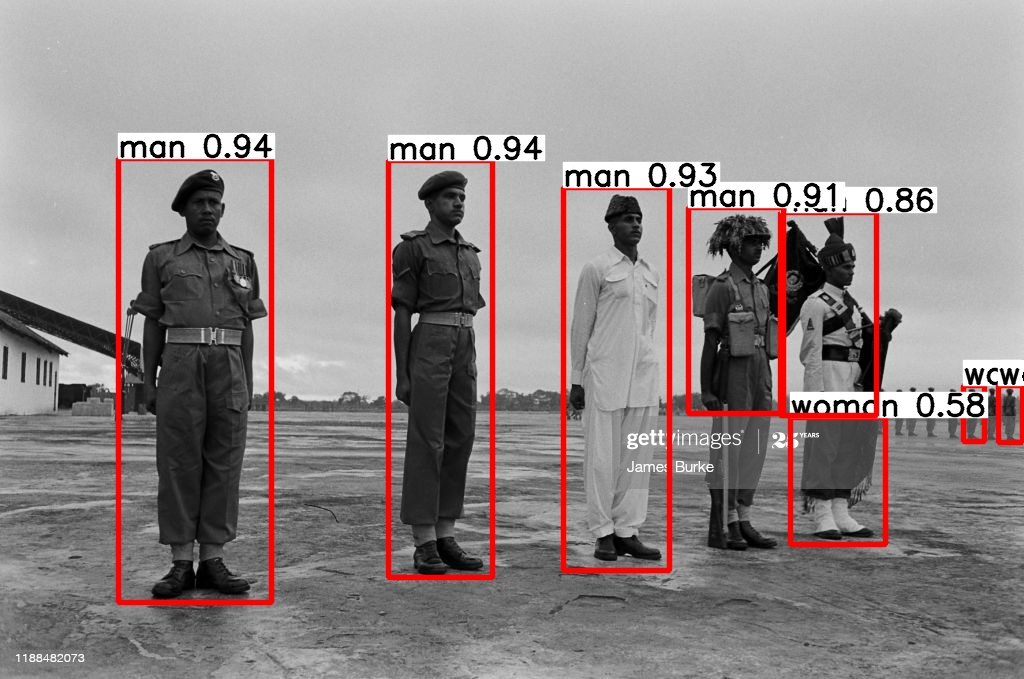

In [ ]:
Image(filename='runs/detect/exp24/dist.jpg', width=600)

In [ ]:
from IPython.display import Image, clear_output

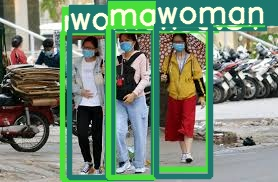

In [ ]:
Image(filename='runs/detect/exp2/images (10).jpeg', width=600)

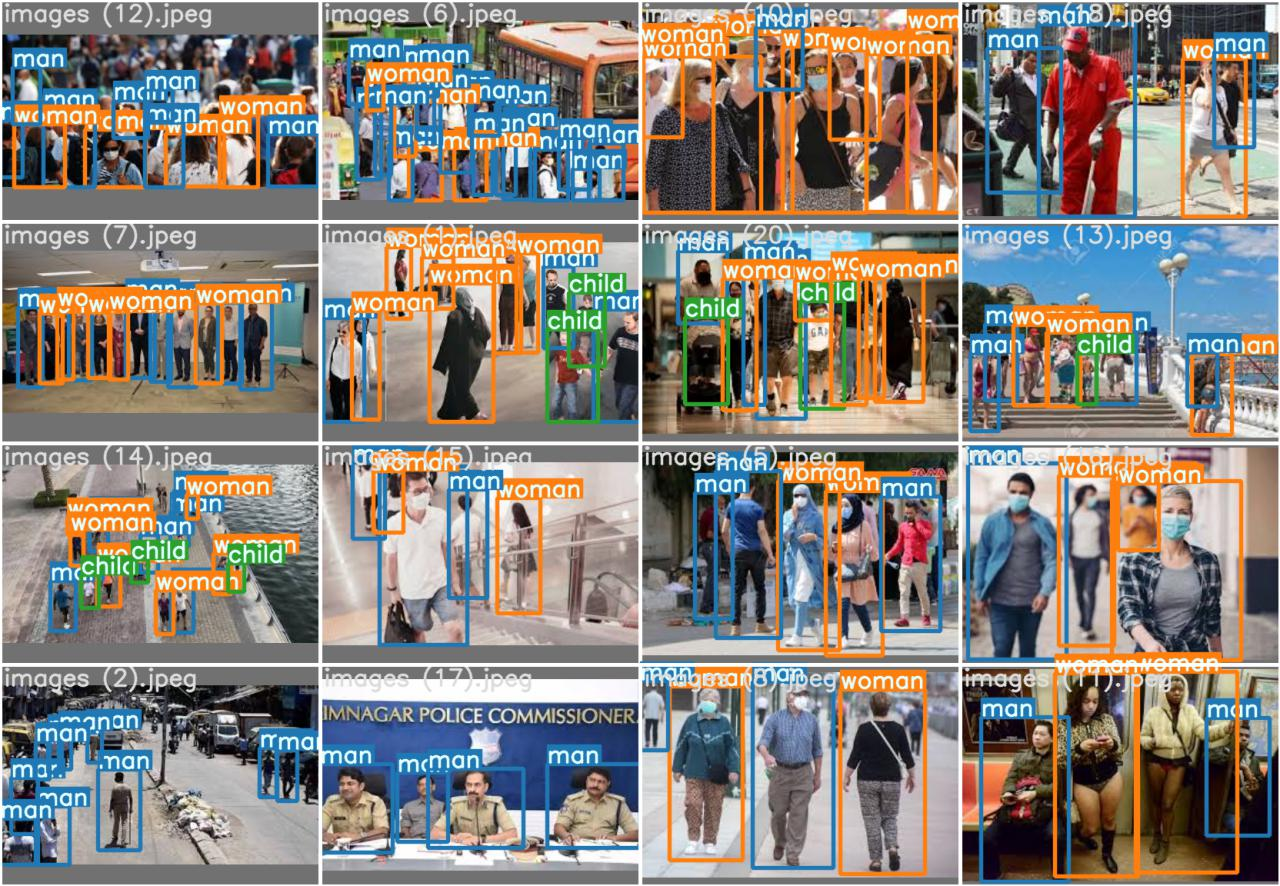

In [ ]:
Image(filename='runs/train/exp5/test_batch0_labels.jpg', width=800)  # test batch 0 labels

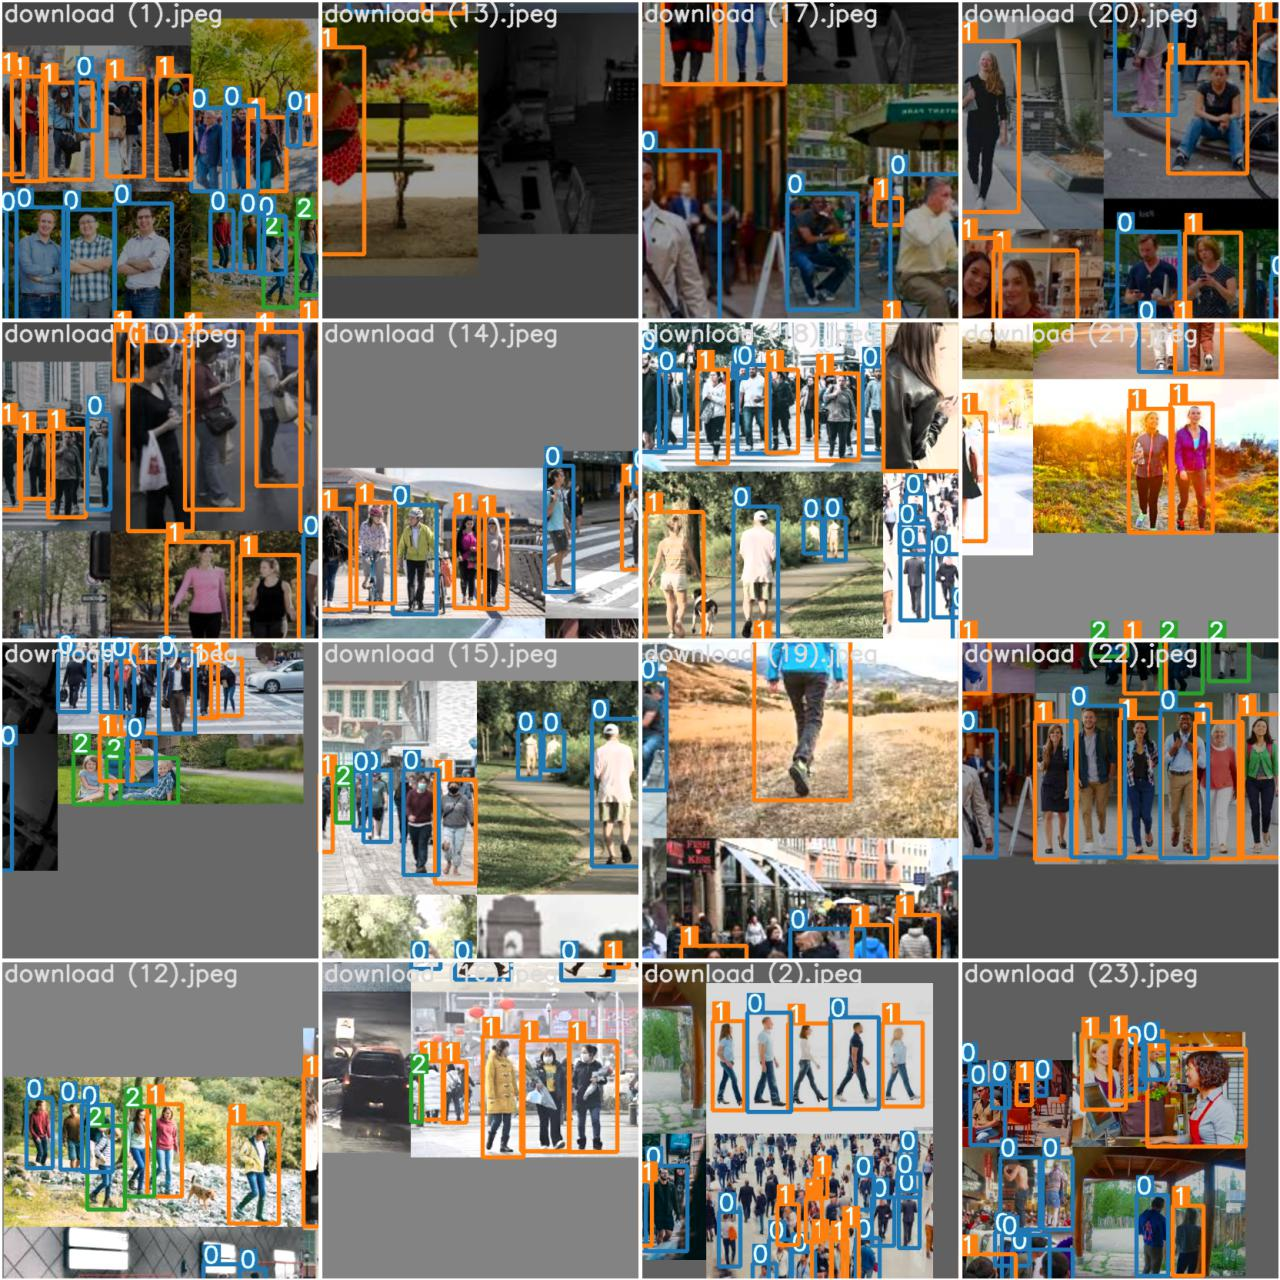

In [ ]:
Image(filename='runs/train/exp5/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels

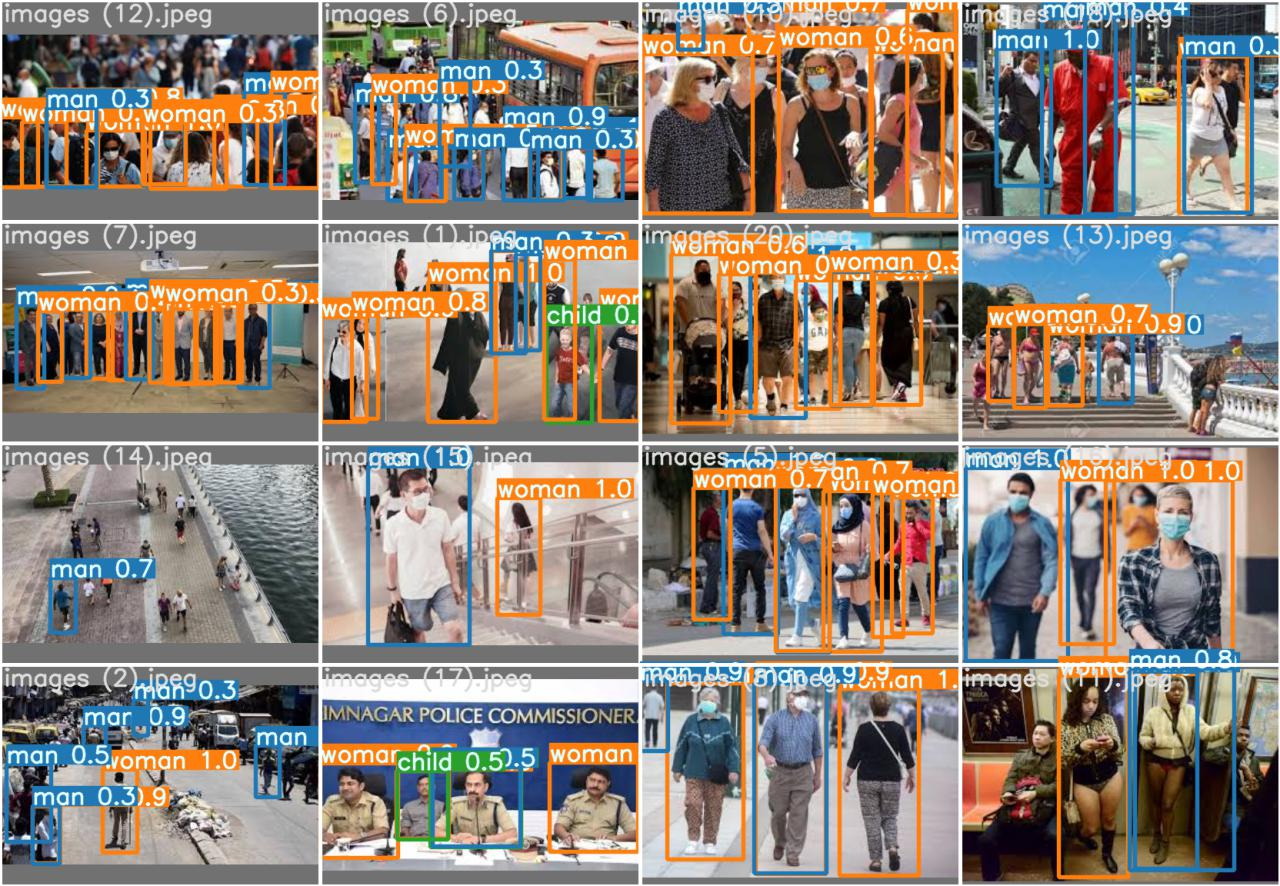

In [ ]:
Image(filename='runs/train/exp5/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

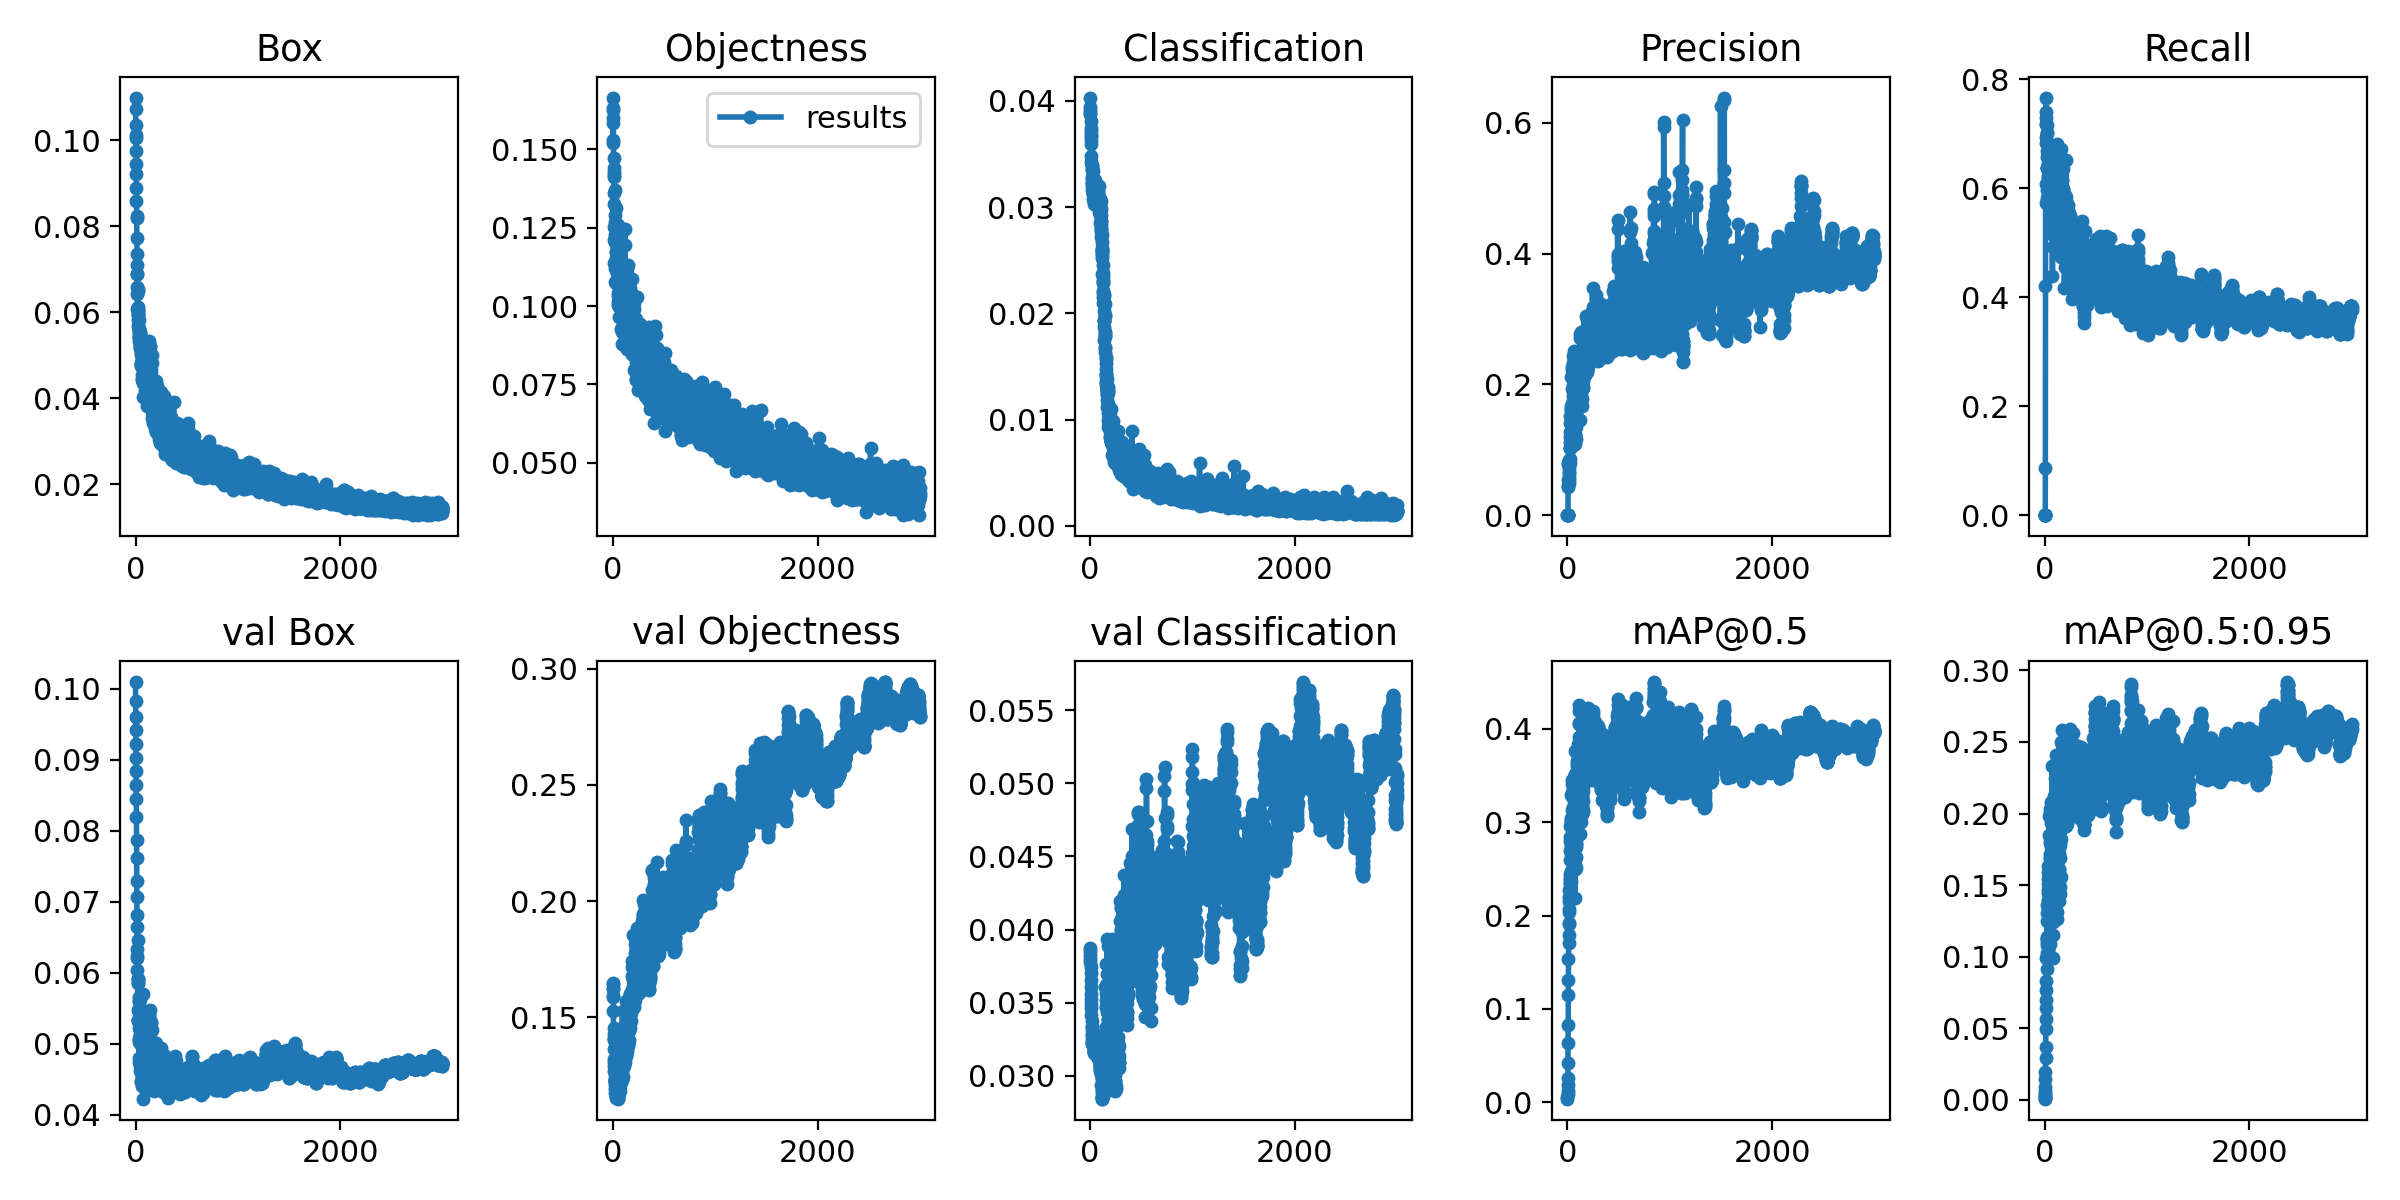

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp5')  # plot all results*.txt as results.png
Image(filename='runs/train/exp5/results.png', width=800)

In [ ]:
#!python train.py --img 416 --batch 16 --epochs 3000 --data dataset.yaml --weights yolov5s.pt --cache

for m in ['yolov5s', 'yolov5m', 'yolov5l', 'yolov5x']:  # zip(batch_size, model)
  !python train.py --batch 16 --weights {m}.pt --data dataset.yaml --epochs 50 --img 416 --name {m}'_attempt1' --cache

Using torch 1.7.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16130MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='', data='./data/dataset.yaml', device='', epochs=50, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], local_rank=-1, log_imgs=16, multi_scale=False, name='yolov5s_attempt1', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/yolov5s_attempt1', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2020-12-01 14:43:18.453918: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0

In [ ]:
%pwd

'/content/drive/My Drive/social_distancing_detector/yolov5'

In [ ]:
# Train YOLOv5x on COCO128 for 100 epochs
!python train.py --img 416 --batch 16 --epochs 100 --data dataset.yaml --weights yolov5x.pt --cache --name yolov5x_100epochs_16batch

Using torch 1.7.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16130MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='', data='./data/dataset.yaml', device='', epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], local_rank=-1, log_imgs=16, multi_scale=False, name='yolov5x_100epochs_16batch', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/yolov5x_100epochs_16batch', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5x.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2020-12-01 18:39:38.961956: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 

In [ ]:
!python detect.py --source ../data/images/test --weights runs/train/yolov5x_100epochs_16batch/weights/best.pt --conf 0.25

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../data/images/test', update=False, view_img=False, weights=['runs/train/yolov5x_100epochs_16batch/weights/best.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16130MB)

Fusing layers... 
Model Summary: 484 layers, 88404072 parameters, 0 gradients
image 1/20 /content/drive/MyDrive/social_distancing_detector/data/images/test/images (1).jpeg: 448x640 4 mans, 4 womans, Done. (0.023s)
image 2/20 /content/drive/MyDrive/social_distancing_detector/data/images/test/images (10).jpeg: 448x640 5 mans, 3 womans, Done. (0.026s)
image 3/20 /content/drive/MyDrive/social_distancing_detector/data/images/test/images (11).jpeg: 416x640 1 mans, 1 womans, Done. (0.023s)
image 4/20 /content/drive/MyDrive/social_distancing_detector/data/images/test/images (12).jpeg: 640x416 2 mans, 2 womans,

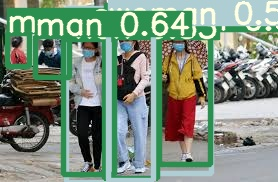

In [ ]:
Image(filename='runs/detect/exp3/images (10).jpeg', width=1000)

In [ ]:
# Train YOLOv5x on dataset for 3000 epochs --device 0
!python train.py --img 416 --batch 16 --epochs 3000 --data dataset.yaml --weights yolov5x.pt --cache --name yolov5x_3000epochs_16batch

Streaming output truncated to the last 5000 lines.
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]
                 all          21         165       0.334       0.343       0.402       0.289

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
 2010/2999      7.3G   0.01212   0.03265  0.001389   0.04616        53       416: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]
                 all          21         165       0.311       0.338       0.404       0.289

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
 2011/2999      7.3G   0.01124   0.03266  0.001147   0.04505        41       416: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]
               Class      Images     Targets           P       

In [ ]:
# Train YOLOv5x on dataset for 1000 epochs
!python train.py --img 416 --batch 16 --epochs 1000 --data dataset.yaml --weights yolov5x.pt --cache 

Streaming output truncated to the last 5000 lines.
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]
                 all          31         212       0.104       0.839       0.283       0.126

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
    10/999     7.17G   0.05984    0.1243   0.03485     0.219        72       416: 100%|██████████| 10/10 [00:03<00:00,  3.03it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]
                 all          31         212       0.134       0.827       0.297       0.138

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
    11/999     7.17G   0.05675    0.1233   0.03506    0.2151        70       416: 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]
               Class      Images     Targets           P   

In [ ]:
!python detect.py --source ../data/videos/input/trial1.mp4 --weights runs/train/exp7/weights/best.pt --conf 0.25

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../data/videos/input/trial1.mp4', update=False, view_img=False, weights=['runs/train/exp7/weights/best.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16130MB)

Fusing layers... 
Model Summary: 484 layers, 88404072 parameters, 0 gradients
video 1/1 (1/1694) /content/drive/MyDrive/social_distancing_detector/data/videos/input/trial1.mp4: 384x640 2 mans, Done. (0.054s)
video 1/1 (2/1694) /content/drive/MyDrive/social_distancing_detector/data/videos/input/trial1.mp4: 384x640 2 mans, Done. (0.020s)
video 1/1 (3/1694) /content/drive/MyDrive/social_distancing_detector/data/videos/input/trial1.mp4: 384x640 2 mans, Done. (0.030s)
video 1/1 (4/1694) /content/drive/MyDrive/social_distancing_detector/data/videos/input/trial1.mp4: 384x640 2 mans, Done. (0.022s)
video 1/1 (5/1694) /

In [ ]:
# !python train.py --img 416 --batch 16 --epochs 10 --data vid_dataset.yaml --weights yolov5x.pt --cache --name vid_model

Using torch 1.7.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16130MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='', data='./data/vid_dataset.yaml', device='', epochs=10, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], local_rank=-1, log_imgs=16, multi_scale=False, name='vid_model', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/vid_model', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5x.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2020-12-03 02:07:00.494916: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box':

In [ ]:
%ls

data/       models/           test.py         v.py        yolov5m.pt
detect.py   __pycache__/      train.py        wandb/      yolov5s.pt
Dockerfile  README.md         tutorial.ipynb  weights/    yolov5x.pt
hubconf.py  requirements.txt  utils/          yolov5/
LICENSE     runs/             vid.py          yolov5l.pt


In [ ]:
!python detect.py --source ../data/images/test --weights runs/train/exp7/weights/best.pt --conf 0.25

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../data/images/test', update=False, view_img=False, weights=['runs/train/exp7/weights/best.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16130MB)

Fusing layers... 
Model Summary: 484 layers, 88404072 parameters, 0 gradients
image 1/20 /content/drive/MyDrive/social_distancing_detector/data/images/test/images (1).jpeg: 448x640 2 mans, 2 womans, Done. (0.023s)
image 2/20 /content/drive/MyDrive/social_distancing_detector/data/images/test/images (10).jpeg: 448x640 4 mans, 2 womans, Done. (0.020s)
image 3/20 /content/drive/MyDrive/social_distancing_detector/data/images/test/images (11).jpeg: 416x640 2 womans, Done. (0.023s)
image 4/20 /content/drive/MyDrive/social_distancing_detector/data/images/test/images (12).jpeg: 640x416 1 mans, 2 womans, Done. (0.023s)
image 5/20 /c

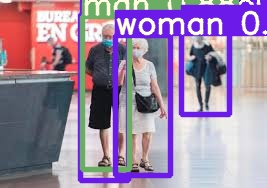

In [ ]:
Image(filename='runs/detect/exp5/images (4).jpeg', width=600)

# PyTorch


In [ ]:
import torch
# from PIL import Image

In [ ]:
# Model
path = '/content/drive/MyDrive/social_distancing_detector/yolov5/runs/train/exp7/weights/best.pt'
model = torch.load(path)  # for PIL/cv2/np inputs and NMS

In [ ]:
torch.save(model, 'tensor.pt')

In [ ]:
import os
imgs = []
directory = r'/content/drive/MyDrive/social_distancing_detector/data/images/test'
for filename in os.listdir(directory):
    if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
        imgs.append(os.path.join(directory, filename))
    else:
        continue

In [ ]:
images = []
for i in imgs:
  img = Image.open(i)
  images.append(img)
print(type(images[0]))
prediction = model(images)  # includes NMS

<class 'PIL.JpegImagePlugin.JpegImageFile'>


TypeError: ignored

In [ ]:
prediction = model(Image.open('/content/drive/MyDrive/social_distancing_detector/data/images/test/images (1).jpeg'))  # includes NMS

AttributeError: ignored

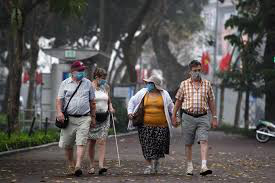

In [ ]:
Image.open('/content/drive/MyDrive/social_distancing_detector/data/images/test/images (1).jpeg')

In [ ]:
%pwd

'/content/drive/My Drive/social_distancing_detector/yolov5'

In [ ]:
import torch
from PIL import Image

# Model
path = '/content/drive/MyDrive/social_distancing_detector/yolov5/runs/train/exp7/weights/best.pt'
model = torch.load(path)  # for PIL/cv2/np inputs and NMS

# Images
img1 = Image.open('data/images/zidane.jpg')
img2 = Image.open('data/images/bus.jpg')
imgs = [img1, img2]  # batched list of images


In [ ]:
model(img1, size=640)  # includes NMS

TypeError: ignored

In [ ]:
%cp /content/drive/MyDrive/social_distancing_detector/yolov5/runs/train/exp6/weights/best.pt /content/drive/My\ Drive